In [117]:
import pandas as pd
import seaborn as sns                                                                                     
import matplotlib.pyplot as plt
import numpy as np

In [118]:
sns.set_theme(style="darkgrid")

In [119]:
normal = pd.read_csv("results_normal_ablation.csv")
qr_cached_backwards = pd.read_csv("results_qr_cached_backwards_ablation.csv")

normal["speedup"] = normal["bdmm_duration"] / normal["flow_duration"]
qr_cached_backwards["speedup"] = qr_cached_backwards["bdmm_duration"] / qr_cached_backwards["flow_duration"]

normal["method"] = "normal"
qr_cached_backwards["method"] = "qr_cached_backwards"

normal["error"] = (normal["flow_likelihood"] - normal["bdmm_likelihood"]).abs()
qr_cached_backwards["error"] = (qr_cached_backwards["flow_likelihood"] - qr_cached_backwards["bdmm_likelihood"]).abs()

<Axes: xlabel='method', ylabel='speedup'>

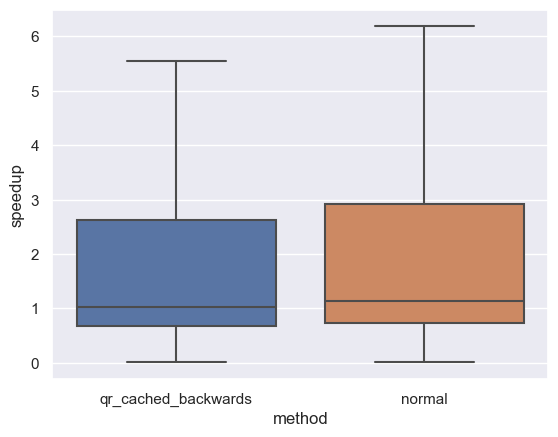

In [120]:
sns.boxplot(data=pd.concat([qr_cached_backwards, normal]), y="speedup", x="method", showfliers=False)

/var/folders/f_/r0jt4c1153v7d286lm9gbgx80000gn/T/ipykernel_9211/3925423591.py:1: RuntimeWarning: divide by zero encountered in log10
  normal["binned_error"] = normal["error"].map(lambda x: np.log10(x) // 1)
/var/folders/f_/r0jt4c1153v7d286lm9gbgx80000gn/T/ipykernel_9211/3925423591.py:2: RuntimeWarning: divide by zero encountered in log10
  qr_cached_backwards["binned_error"] = qr_cached_backwards["error"].map(lambda x: np.log10(x) // 1)


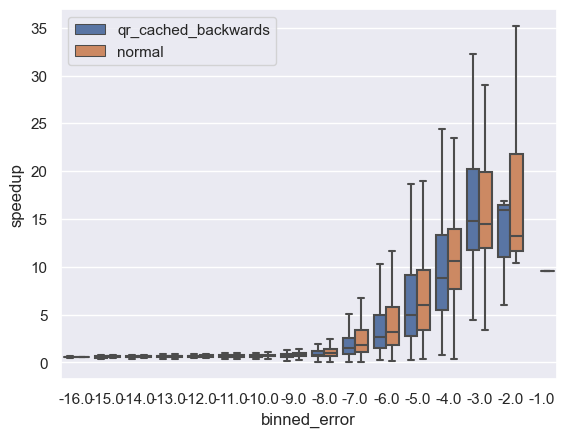

In [121]:
normal["binned_error"] = normal["error"].map(lambda x: np.log10(x) // 1)
qr_cached_backwards["binned_error"] = qr_cached_backwards["error"].map(lambda x: np.log10(x) // 1)

ax = sns.boxplot(data=pd.concat([qr_cached_backwards, normal]), x="binned_error", y="speedup", hue="method", showfliers=False)
ax.legend()

(0.0, 10.0)

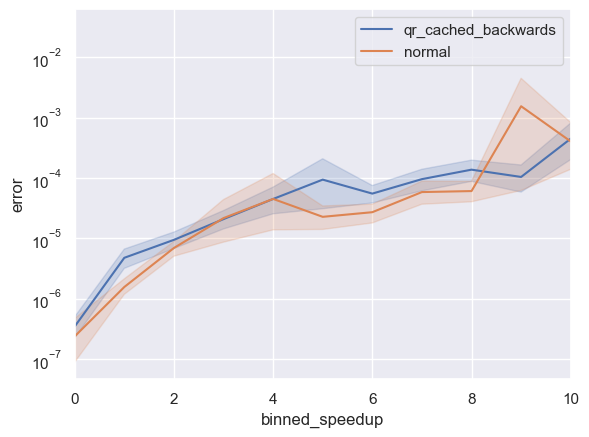

In [122]:
normal["binned_speedup"] = normal["speedup"].map(lambda x: x // 1)
qr_cached_backwards["binned_speedup"] = qr_cached_backwards["speedup"].map(lambda x: x // 1)

ax = sns.lineplot(data=pd.concat([qr_cached_backwards, normal]).reset_index(), y="error", x="binned_speedup", hue="method")
ax.legend()

plt.yscale("log")

plt.xlim(0, 10)
# plt.ylim(0, 0.0005)

In [123]:
normal[normal["leaf_count"] > 500]

,node_count,leaf_count,types_count,process_length,flow_likelihood,flow_duration,bdmm_likelihood,bdmm_duration,use_intervals,min_num_intervals,integrator,initialMatrixType,rel_tolerance,speedup,method,error,binned_error,binned_speedup
30,1359,680,2,3.765247,-4248.766208,2309541,-4248.766195,42375458,False,1,DormandPrince54Integrator,RANDOM,1.795642e-08,18.348000,normal,1.256017e-05,-5.0,18.0
132,1605,803,8,4.716403,-6257.348133,4225208,-6257.348141,68676334,False,1,DormandPrince54Integrator,RANDOM,9.325985e-08,16.253953,normal,7.796714e-06,-6.0,16.0
401,1875,938,5,4.801789,-7426.855746,2264000,-7426.854717,37739375,False,1,DormandPrince54Integrator,RANDOM,3.675121e-06,16.669335,normal,1.028884e-03,-3.0,16.0
439,1113,557,3,3.591342,-3467.502058,876000,-3467.501865,9973417,False,1,DormandPrince54Integrator,RANDOM,3.803926e-07,11.385179,normal,1.932101e-04,-4.0,11.0
490,1283,642,10,4.769391,-5306.962707,3307291,-5306.967764,113765875,False,1,DormandPrince54Integrator,RANDOM,3.689455e-06,34.398508,normal,5.056948e-03,-3.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9816,1165,583,8,3.717314,-4383.546291,2465042,-4383.546291,49524000,False,1,DormandPrince54Integrator,RANDOM,1.280482e-08,20.090530,normal,3.576224e-07,-7.0,20.0
9853,2449,1225,2,4.254584,-7969.387447,1508250,-7969.385754,15886000,False,1,DormandPrince54Integrator,RANDOM,7.022823e-07,10.532737,normal,1.692658e-03,-3.0,10.0
9900,1355,678,5,4.892224,-4614.895180,1643834,-4614.895071,25354584,False,1,DormandPrince54Integrator,RANDOM,1.595166e-07,15.424054,normal,1.087606e-04,-4.0,15.0
9960,9459,4730,3,4.945321,-40279.611284,10116458,-40279.610832,87479709,False,1,DormandPrince54Integrator,RANDOM,8.369056e-08,8.647267,normal,4.519943e-04,-4.0,8.0


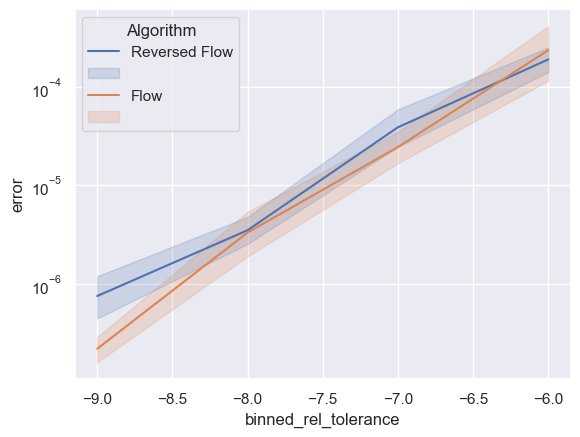

In [124]:
normal["binned_rel_tolerance"] = normal["rel_tolerance"].map(lambda x: np.log10(x) * 2 // 2)
qr_cached_backwards["binned_rel_tolerance"] = qr_cached_backwards["rel_tolerance"].map(lambda x: np.log10(x) * 2 // 2)

sns.lineplot(data=qr_cached_backwards, y="error", x="binned_rel_tolerance")
sns.lineplot(data=normal, y="error", x="binned_rel_tolerance")
plt.legend(labels=["Reversed Flow", "", "Flow", ""], title="Algorithm")

plt.yscale("log")